# Bidirectional Search

In [1]:
import time

from test_.Performancetest import GraphPerformanceTester
from src.Graph import Graph
import src.printGraph as pg
import src.shortestPaths as sp
import timeit
import networkx as nx
from tqdm import tqdm
import random

def Average(lst):
    return sum(lst) / len(lst)

## Beispielanwendung
Es wird ein Graph mit 16 Knoten erzeugt. Dabei gibt es verschiedene Kombinationen, welche zum Teil speziele Probleme wie das auftreten einzelner Konten oder besonderer Lable repräsentieren soll.

In [2]:
G = Graph()

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,3)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,6)
G.add_edge(0,-1)
G.add_edge(10,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,10)

G.add_node(9)
G.add_node(15)

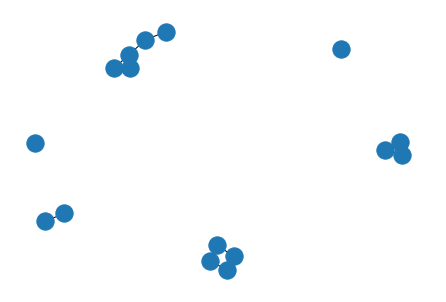

In [3]:
pg.draw_graph(G)

Anwendung der Bidirektionale Suche auf die Nodes s = 1, t = 5

In [4]:
print(sp.shortest_s_t_path(G,1,5))

(['1', '2', '3', '5'], 3)


In [5]:
print(sp.shortest_s_t_path(G,0,-1))

(['0', '-1'], 1)


In [6]:
print(sp.shortest_s_t_path(G,-1,0))

(['-1', '0'], 1)


In [7]:
print(sp.shortest_s_t_path(G,12,10))

(['12', '11', '10'], 2)


In [8]:
print(sp.shortest_s_t_path(G,1,15))

([], inf)


In [9]:
print(sp.shortest_s_t_path(G,15,15))

(['15'], 0)


![alt text](Netzwerk.png "Title")

In [10]:
G = Graph()
G.add_edge(1,2);G.add_edge(1,6);G.add_edge(2,6);G.add_edge(2,3);G.add_edge(6,7);G.add_edge(3,4);G.add_edge(3,7);G.add_edge(7,8);G.add_edge(4,8);G.add_edge(4,5);G.add_edge(8,5);
print(sp.shortest_s_t_path(G,1,5))

(['1', '2', '3', '4', '5'], 4)


## Umsetzung und Laufzeit

### Queue:
Verwendung von len() in O(1) möglich - Im Vergleich zur Liste O(1) <br>
Verwendung von popleft() in O(1) möglich - Im Vergleich zur Liste O(n) <br>
Verwendung von append() in O(1) möglich - Im Vergleich zur Liste O(1) <br>
Verwendung von append() in O(1) möglich - Im Vergleich zur Liste O(1) <br>

-> Wegen popleft wurde sich für eine Queue entschieden

### Dictionary
Verwendung von if Item in Dictionary in O(1) [Average Case] / O(n) [Amortized Worst Case] möglich- Im Vergleich zur Liste O(n) <br>
Verwendung von Dictionary[x] = y in O(1) [Average Case] / O(n) [Amortized Worst Case] möglich- Im Vergleich zur Liste O(1)

-> Wegen dem Key-Value Paaren wurde sich für eine Dictionary entschieden


## Vergleich mit Networkx

In [11]:
network_file ="networks/bio-celegans.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
nxG = nx.read_edgelist(network_file,comments="%")

In [12]:
num_iterations = 10
num_repeat = 10

s = 1
t = 227

time_shortest_s_t_path_list = timeit.repeat(lambda: sp.shortest_s_t_path(G,s,t),time.process_time, repeat= num_repeat,number=num_iterations)
nx_time_shortest_s_t_path_list = timeit.repeat(lambda: nx.bidirectional_shortest_path(nxG,str(s),str(t)),time.process_time, repeat= num_repeat,number=num_iterations)
SpeedUP = [time_shortest_s_t_path_list[i]/nx_time_shortest_s_t_path_list[i] for i in range(len(time_shortest_s_t_path_list))]

print("time_shortest_s_t_path: ", Average(time_shortest_s_t_path_list))
print("networkx - time_shortest_s_t_path: ", Average(nx_time_shortest_s_t_path_list))
print("networkx - SpeedUp: ", Average(SpeedUP))

time_shortest_s_t_path:  6.802999999990788e-05
networkx - time_shortest_s_t_path:  4.357999999999862e-05
networkx - SpeedUp:  1.749188447647906


In [13]:
GPT = GraphPerformanceTester(sizes = [100, 500, 1000], iters = 25, graph_density=0.1)
apsp_perf = GPT.run_tests(sp.shortest_s_t_path, nx.bidirectional_shortest_path, (str(1),str(2)), generators=[True,True], verbose = False)

generating graphs


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 665.21it/s]


running tests


NetworkXNoPath: No path between 1 and 2.

## Sonderfälle

![alt text](Vergleich.png "Title")

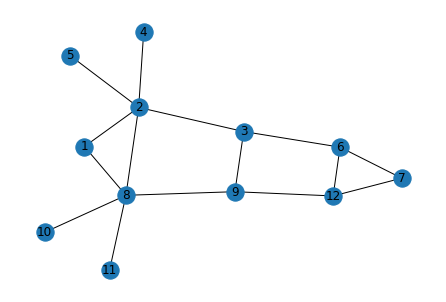

In [14]:
network_file ="networks/special_case_for_networkx.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
nxG = nx.read_edgelist(network_file,comments="%")
pg.draw_graph(G,label_on = True)

In [15]:
s = 1
t = 7
time_shortest_s_t_path_list = timeit.repeat(lambda: sp.shortest_s_t_path(G,s,t),time.process_time, repeat= num_repeat,number=num_iterations)
nx_time_shortest_s_t_path_list = timeit.repeat(lambda: nx.bidirectional_shortest_path(nxG,str(s),str(t)),time.process_time, repeat= num_repeat,number=num_iterations)
SpeedUP = [time_shortest_s_t_path_list[i]/nx_time_shortest_s_t_path_list[i] for i in range(len(time_shortest_s_t_path_list))]

print("time_shortest_s_t_path: ", Average(time_shortest_s_t_path_list))
print("networkx - time_shortest_s_t_path: ", Average(nx_time_shortest_s_t_path_list))
print("networkx - SpeedUp: ", Average(SpeedUP))

time_shortest_s_t_path:  6.938000000005218e-05
networkx - time_shortest_s_t_path:  8.340000000011117e-05
networkx - SpeedUp:  0.8421710452383975


# Grenzen

In [16]:
network_file ="./networks/bio-dmela.mtx"
G = Graph(network_file, Graph.READ_MOD_EDGE_LIST)
print(G.n,G.m)

s_t = random.sample(G.get_nodes(),2)
start = time.time()
sp.shortest_s_t_path(G,s_t[0],s_t[1])
end = time.time()
print(f"shortest_s_t_path for {G.n}, {G.m}: ", end-start)


7393 25569
shortest_s_t_path for 7393, 25569:  0.0


In [ ]:
density = 0.0001
add_N = 200000
G = Graph()
source = "3"
connected_nodes = [source]
for i in tqdm(range(0,add_N)):
    G.add_node(i)
max_edges = int((G.n * (G.n-1))/2)
for _ in tqdm(range(int(max_edges*density))):
    a = random.choice(connected_nodes)
    b = str(random.randint(1,G.n))
    while a == b:
        b = str(random.randint(1,G.n))
    G.add_edge(a,b)
    connected_nodes.append(b)

for i in range(100):
    s_t = random.sample(G.get_nodes(),2)
    start = time.time()
    path = sp.shortest_s_t_path(G,s_t[0],s_t[1])
    end = time.time()
    if path[0] != [] and end-start > 0.0:
        print(f"shortest path for {G.n}, {G.m} from {s_t[0]} to {s_t[1]}: ", end-start)